In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/content/drive/MyDrive/DataScience/telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
df.shape

(99999, 226)

#### Understanding the data with the help of data disctionary

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Data Cleaning

#### Removing columns which has no use

    We can remove all the dates from our data as these dates are not usefull
    We can remove the mobile number, as in this data it will be unique and will not provide any insight
    we can remove circle_id column as this column has only one unique value.

In [9]:
date_cols = [k for k in df.columns.to_list() if 'date' in k]
date_cols.append('mobile_number')
date_cols.append('circle_id')
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'mobile_number', 'circle_id']


In [10]:
df.drop(date_cols, axis=1, inplace=True)
df.shape

(99999, 212)

#### Check for Missing values in each columns

In [11]:
df_missing_cols = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols.columns=['missing_per']
df_missing_cols

,missing_per
max_rech_data_6,74.85
total_rech_data_6,74.85
count_rech_2g_6,74.85
fb_user_6,74.85
count_rech_3g_6,74.85
...,...
total_rech_num_6,0.00
total_ic_mou_9,0.00
total_ic_mou_8,0.00
total_ic_mou_7,0.00


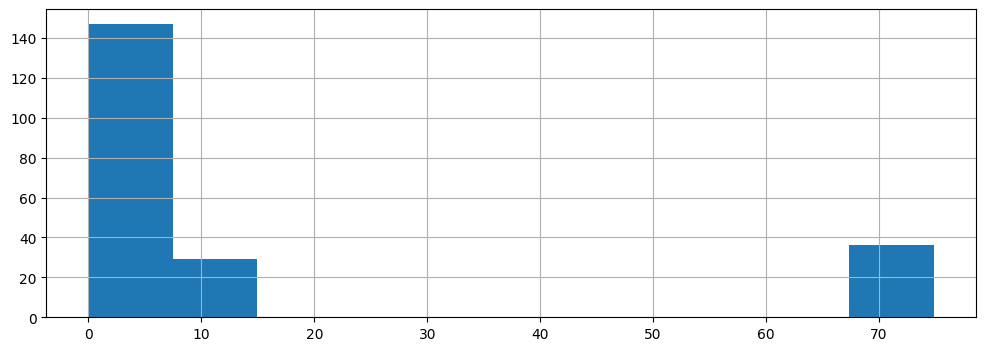

In [12]:
fig =df_missing_cols.missing_per.hist(figsize=(12, 4))

#### There are lots of columns having missing values ranging from 1% to 15% and there are around 36 columns where missing percentage is way too high 70%
#### We can safely remove these high missing percentage columns, the we can go back and check columns which are in the range of 15% missing value and see how can we impute the values 

Checking how many columns having missing values more then say 20%

In [13]:
df_missing_20_cols = list(df_missing_cols.index[df_missing_cols['missing_per'] > 20])
print(df_missing_20_cols)
len(df_missing_20_cols)

['max_rech_data_6', 'total_rech_data_6', 'count_rech_2g_6', 'fb_user_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'max_rech_data_7', 'total_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7', 'arpu_2g_9', 'count_rech_2g_9', 'total_rech_data_9', 'fb_user_9', 'arpu_3g_9', 'av_rech_amt_data_9', 'max_rech_data_9', 'night_pck_user_9', 'count_rech_3g_9', 'night_pck_user_8', 'arpu_2g_8', 'av_rech_amt_data_8', 'count_rech_3g_8', 'arpu_3g_8', 'count_rech_2g_8', 'total_rech_data_8', 'fb_user_8', 'max_rech_data_8']


36

In [14]:
df.drop(df_missing_20_cols, axis=1, inplace=True)
df.shape

(99999, 176)

In [15]:
round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)

,null
std_og_t2c_mou_9,7.75
std_og_mou_9,7.75
loc_og_t2m_mou_9,7.75
loc_og_t2f_mou_9,7.75
std_ic_t2f_mou_9,7.75
...,...
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00
last_day_rch_amt_8,0.00


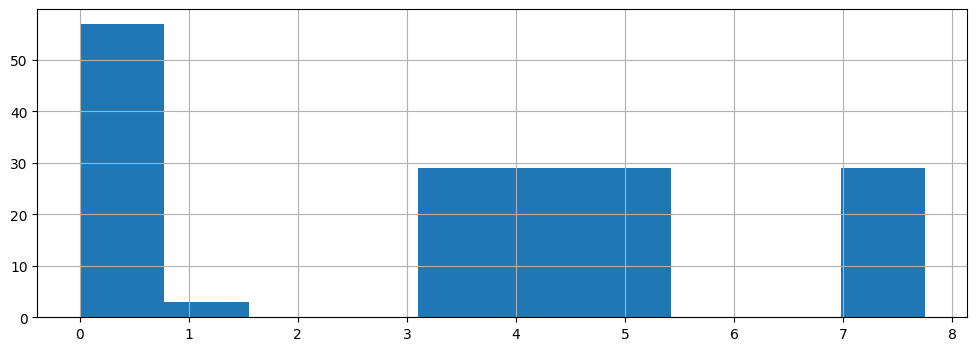

In [16]:
df_missing_cols = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols.columns=['missing_per']
df_missing_cols
fig =df_missing_cols.missing_per.hist(figsize=(12, 4))

In [17]:
df_missing_cols[df_missing_cols['missing_per']>0]

,missing_per
std_og_t2c_mou_9,7.75
std_og_mou_9,7.75
loc_og_t2m_mou_9,7.75
loc_og_t2f_mou_9,7.75
std_ic_t2f_mou_9,7.75
...,...
loc_ic_t2t_mou_7,3.86
spl_ic_mou_7,3.86
loc_og_t2o_mou,1.02
std_og_t2o_mou,1.02


#### Let check columns having information of MOU, as we can see here that all missing percentage columns have mou in it.

In [18]:
df_missing_cols[df_missing_cols['missing_per']>0].to_string()

'                  missing_per\nstd_og_t2c_mou_9         7.75\nstd_og_mou_9             7.75\nloc_og_t2m_mou_9         7.75\nloc_og_t2f_mou_9         7.75\nstd_ic_t2f_mou_9         7.75\nloc_og_t2c_mou_9         7.75\nloc_og_mou_9             7.75\nstd_og_t2m_mou_9         7.75\nstd_ic_t2m_mou_9         7.75\nstd_og_t2f_mou_9         7.75\nisd_og_mou_9             7.75\nroam_og_mou_9            7.75\nstd_ic_t2t_mou_9         7.75\nspl_og_mou_9             7.75\nog_others_9              7.75\nspl_ic_mou_9             7.75\nloc_ic_t2t_mou_9         7.75\nloc_ic_mou_9             7.75\nloc_ic_t2m_mou_9         7.75\nloc_ic_t2f_mou_9         7.75\nloc_og_t2t_mou_9         7.75\nstd_og_t2t_mou_9         7.75\nroam_ic_mou_9            7.75\nstd_ic_mou_9             7.75\nonnet_mou_9              7.75\nisd_ic_mou_9             7.75\noffnet_mou_9             7.75\nstd_ic_t2o_mou_9         7.75\nic_others_9              7.75\nspl_ic_mou_8             5.38\nspl_og_mou_8             5.38\noffnet_

#### As we can see here for all months most of MOU data is missing, looks like there are some rows which has these information missing all togather, lets clean them up and see how many records we are going to loose

In [19]:
df_missing_cols[(df_missing_cols['missing_per']>0) & (df_missing_cols.index.str.contains("mou", case=False))]

,missing_per
std_og_t2c_mou_9,7.75
std_og_mou_9,7.75
loc_og_t2m_mou_9,7.75
loc_og_t2f_mou_9,7.75
std_ic_t2f_mou_9,7.75
...,...
loc_ic_t2t_mou_7,3.86
spl_ic_mou_7,3.86
loc_og_t2o_mou,1.02
std_og_t2o_mou,1.02


In [20]:
df_mou_columns = list(df_missing_cols[(df_missing_cols['missing_per']>0) & (df_missing_cols.index.str.contains("mou", case=False))].index)

In [21]:
df_mou_columns

['std_og_t2c_mou_9',
 'std_og_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'std_ic_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2m_mou_9',
 'std_ic_t2m_mou_9',
 'std_og_t2f_mou_9',
 'isd_og_mou_9',
 'roam_og_mou_9',
 'std_ic_t2t_mou_9',
 'spl_og_mou_9',
 'spl_ic_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_og_t2t_mou_9',
 'std_og_t2t_mou_9',
 'roam_ic_mou_9',
 'std_ic_mou_9',
 'onnet_mou_9',
 'isd_ic_mou_9',
 'offnet_mou_9',
 'std_ic_t2o_mou_9',
 'spl_ic_mou_8',
 'spl_og_mou_8',
 'offnet_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'onnet_mou_8',
 'std_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_og_t2m_mou_8',
 'isd_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'roam_og_mou_8',
 'std_og_t2c_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'loc_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_mou_8',
 '

In [22]:
filtered_df = df[df[df_mou_columns].isnull().all(1)]


In [23]:
filtered_df.shape, filtered_df.head()

((1018, 176),
      loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  arpu_7  arpu_8  \
 201             NaN             NaN             NaN   45.000    46.5   46.50   
 202             NaN             NaN             NaN  126.339     0.0    0.00   
 232             NaN             NaN             NaN    0.700     0.0  108.46   
 275             NaN             NaN             NaN   90.208     0.0    0.00   
 279             NaN             NaN             NaN    0.900     0.0  106.76   
 
      arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
 201    45.0          NaN          NaN          NaN          NaN           NaN   
 202     0.0          NaN          NaN          NaN          NaN           NaN   
 232     0.0          NaN          NaN          NaN          NaN           NaN   
 275     0.0          NaN          NaN          NaN          NaN           NaN   
 279     0.0          NaN          NaN          NaN          NaN           NaN   
 
    

In [24]:
len(filtered_df)*100/len(df), len(filtered_df), len(df)

(1.018010180101801, 1018, 99999)

#### 1% of data has all MOU columns null across the 4 months, which is around 1018 records, this can be removed

In [25]:
df_orig = df.copy()
df = df.drop(filtered_df.index)
df.shape

(98981, 176)

#### Let's check missing values one more time

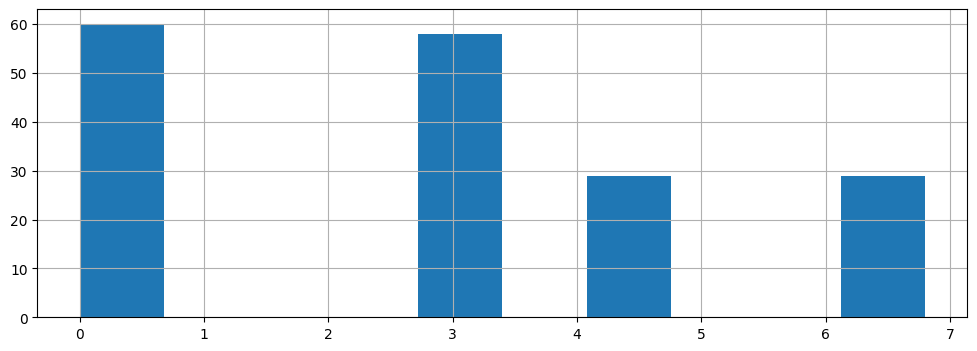

In [26]:
df_missing_cols = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols.columns=['missing_per']
df_missing_cols
fig =df_missing_cols.missing_per.hist(figsize=(12, 4))

In [27]:
df_mou_columns_2 = list(df_missing_cols[(df_missing_cols['missing_per']>0) & (df_missing_cols.index.str.contains("mou", case=False))].index)

In [28]:
df_mou_columns_2
df[df[df_mou_columns_2].isnull().all(1)]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


### Data preparation

####  Filter high-value customers
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [29]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

370.0

In [30]:
df[df['avg_rech_amt_6_7'] >= X].shape

(29793, 177)

#### As per instructions give, after filtering data for high value customers we are having ~ 30K records. So lets take these as our working data from hear on

In [31]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00

In [32]:
round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)

,null
loc_ic_mou_9,5.33
std_og_t2c_mou_9,5.33
spl_og_mou_9,5.33
std_ic_t2f_mou_9,5.33
isd_og_mou_9,5.33
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


#### Checking for missing values again

In [33]:
df_missing_cols_2 = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols_2.columns=['missing_per']
df_missing_cols_2[(df_missing_cols_2['missing_per']>0)]

,missing_per
loc_ic_mou_9,5.33
std_og_t2c_mou_9,5.33
spl_og_mou_9,5.33
std_ic_t2f_mou_9,5.33
isd_og_mou_9,5.33
...,...
spl_og_mou_7,0.63
og_others_7,0.63
isd_og_mou_7,0.63
loc_ic_t2m_mou_7,0.63


#### we sill have missing values, we will revisit this once we remove the data for for "Churn Phase" which is sept month data, so let's tag "Churn" on Good Phase & Active Phase data based on Churn Phase data

#### Tag Churn
    Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [34]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0

#### Deleting all the attributes corresponding to the churn phase

In [35]:
churn_phase_cols_9 = [col for col in df.columns.to_list() if '_9' in col]
churn_phase_cols_sept = [col for col in df.columns.to_list() if 'sep' in col]
print(churn_phase_cols_9)
print(churn_phase_cols_sept)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']
['sep_vbc_3g']


In [36]:
df = df.drop(churn_phase_cols_9, axis=1)
df = df.drop(churn_phase_cols_sept, axis=1)

In [37]:
df_missing_cols_2 = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols_2.columns=['missing_per']
df_missing_cols_2

,missing_per
loc_og_t2c_mou_8,2.77
roam_og_mou_8,2.77
std_og_t2t_mou_8,2.77
loc_ic_t2f_mou_8,2.77
std_ic_t2f_mou_8,2.77
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00


In [38]:
df_mou_null_aug_cols = ((df_missing_cols_2[df_missing_cols_2['missing_per'] == 2.77]).index).to_list()
df_mou_null_aug_cols

['loc_og_t2c_mou_8',
 'roam_og_mou_8',
 'std_og_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'loc_og_mou_8',
 'std_ic_t2o_mou_8',
 'std_og_t2f_mou_8',
 'loc_ic_t2t_mou_8',
 'std_og_t2c_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'std_ic_mou_8',
 'std_og_mou_8',
 'loc_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_ic_t2m_mou_8',
 'isd_og_mou_8',
 'loc_ic_t2m_mou_8',
 'ic_others_8',
 'roam_ic_mou_8',
 'spl_ic_mou_8',
 'loc_ic_mou_8',
 'offnet_mou_8',
 'std_ic_t2t_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'isd_ic_mou_8',
 'onnet_mou_8']

In [39]:
df_null_mou_Aug = df[df[df_mou_null_aug_cols].isnull().all(1)]
df_null_mou_Aug.head(), df_null_mou_Aug.shape

(     loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  arpu_8  \
 111             0.0             0.0             0.0  596.301  146.073    0.00   
 143             0.0             0.0             0.0  695.609   39.981    0.00   
 188             0.0             0.0             0.0  734.641  183.668    0.00   
 358             0.0             0.0             0.0  688.670  205.780  707.91   
 375             0.0             0.0             0.0  580.477  111.878    0.00   
 
      onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
 111        55.19         3.26          NaN         45.51         12.34   
 143      1325.91        28.61          NaN         13.91          1.89   
 188         4.38         0.98          NaN        105.16         39.39   
 358        68.34        38.93          NaN        550.18        209.68   
 375       249.43        39.64          NaN         62.24         37.24   
 
      offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam

In [40]:
df = df.drop(df_null_mou_Aug.index)

In [41]:
df_missing_cols = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols.columns=['missing_per']
df_missing_cols

,missing_per
std_ic_t2t_mou_6,0.58
roam_og_mou_6,0.58
loc_og_mou_6,0.58
loc_ic_t2m_mou_6,0.58
loc_og_t2c_mou_6,0.58
...,...
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_8,0.00


In [42]:
df_mou_null_jun_cols = ((df_missing_cols[df_missing_cols['missing_per'] == 0.58]).index).to_list()
df_mou_null_jun_cols

['std_ic_t2t_mou_6',
 'roam_og_mou_6',
 'loc_og_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_og_t2c_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'loc_og_t2f_mou_6',
 'og_others_6',
 'std_og_mou_6',
 'loc_og_t2m_mou_6',
 'std_og_t2m_mou_6',
 'std_ic_t2m_mou_6',
 'loc_og_t2t_mou_6',
 'loc_ic_t2t_mou_6',
 'std_ic_t2f_mou_6',
 'spl_og_mou_6',
 'std_ic_t2o_mou_6',
 'roam_ic_mou_6',
 'std_og_t2f_mou_6',
 'std_ic_mou_6',
 'offnet_mou_6',
 'isd_og_mou_6',
 'onnet_mou_6',
 'spl_ic_mou_6',
 'std_og_t2c_mou_6',
 'ic_others_6',
 'isd_ic_mou_6',
 'std_og_t2t_mou_6']

In [43]:
df_null_mou_jun = df[df[df_mou_null_jun_cols].isnull().all(1)]
df_null_mou_jun.head(), df_null_mou_jun.shape

(      loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7  \
 77               0.0             0.0             0.0   30.000   82.378   
 364              0.0             0.0             0.0    0.000  792.112   
 423              0.0             0.0             0.0  213.802  304.194   
 934              0.0             0.0             0.0   48.000  764.152   
 1187             0.0             0.0             0.0    0.000  757.170   
 
        arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
 77    674.950          NaN        34.23       149.69           NaN   
 364   989.368          NaN       433.49       198.96           NaN   
 423   149.710          NaN         0.00         0.00           NaN   
 934   500.030          NaN        14.24        17.48           NaN   
 1187  995.719          NaN      1366.71      2268.91           NaN   
 
       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
 77           39.44        179.18     

In [44]:
df = df.drop(df_null_mou_jun.index)

In [45]:
df_missing_cols = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols.columns=['missing_per']
df_missing_cols

,missing_per
loc_ic_t2f_mou_7,0.15
loc_og_t2t_mou_7,0.15
loc_og_t2m_mou_7,0.15
std_og_mou_7,0.15
loc_og_t2f_mou_7,0.15
...,...
isd_og_mou_6,0.00
std_og_mou_8,0.00
std_og_mou_6,0.00
std_og_t2c_mou_8,0.00


In [46]:
df_mou_null_jul_cols = ((df_missing_cols[df_missing_cols['missing_per'] == 0.15]).index).to_list()
print(df_mou_null_jul_cols)
df_null_mou_jul = df[df[df_mou_null_jul_cols].isnull().all(1)]
df_null_mou_jul.head(), df_null_mou_jul.shape
df = df.drop(df_null_mou_jul.index)

['loc_ic_t2f_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_mou_7', 'loc_og_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'og_others_7', 'ic_others_7', 'std_og_t2t_mou_7', 'spl_og_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'std_og_t2c_mou_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'roam_ic_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7', 'loc_ic_mou_7', 'std_ic_mou_7', 'offnet_mou_7', 'roam_og_mou_7']


In [47]:
df_missing_cols = round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null').sort_values('null', ascending=False)
df_missing_cols.columns=['missing_per']
df_missing_cols

,missing_per
loc_og_t2o_mou,0.0
std_ic_mou_7,0.0
total_rech_num_6,0.0
ic_others_8,0.0
ic_others_7,0.0
...,...
std_og_t2f_mou_6,0.0
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0


### No missing values now

In [48]:
df.shape

(28757, 135)

### Outliers treatment

#### fetch all numeric columns

In [49]:
### First converting 'Churn' column to object type as we don't want to filter on this
df['churn'] = df['churn'].astype(object)

In [50]:
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


##### We are dealing with high value customers only, so lets remove the  outliers below 10th and above 90th percentile

In [51]:
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(28459, 135)

### Derive new features for EDA

#### For understanding the behaviour of customer in action phase, we need to compare few key data points 
#### with respect to good phase
    The Key data points are
        1) MOU => Minutes of Usage Incoming and Outgoing
        2) No of times rechange done
        3) Amount of recharge
        4) ARPU => Average Revenue per User
        5) VBC  => Volume based cost - when no specific scheme is not purchased and paid as per usage

#### Definition of Good phase and Action phase
    Good Phase June and July month (6 & 7)
    Action Phase August month (8)
    
   


In [52]:
# List the columns of total mou, rech_num, rech_amt, arpu and vbc
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [53]:
[total for total in data.columns.to_list() if 'arpu' in total]

['arpu_6', 'arpu_7', 'arpu_8']

In [54]:
[total for total in data.columns.to_list() if 'vbc' in total]

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

#### Let's compare Average value of key data of good phase with action phase

#### Checking decrease in Mou 

In [55]:
data['avg_mou_good'] = (data['total_og_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_6'] + data['total_ic_mou_7'])/2
data['total_mou_action'] = (data['total_og_mou_8'] + data['total_ic_mou_8'])
# Difference avg_mou_good and total_mou_action
data['diff_mou'] = data['total_mou_action']-data['avg_mou_good']
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

#### Checking number of recharge
    This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase

In [56]:
data['avg_rech_num_good'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2
# Difference avg_rech_num_good and total_rech_num_action
data['diff_rech_num'] = data['total_rech_num_8']-data['avg_rech_num_good']
# Checking whether the rech num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

#### Checking recharge amount
    This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase

In [57]:
data['avg_rech_amt_good'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
# Difference avg_rech_num_good and total_rech_num_action
data['diff_rech_amt'] = data['total_rech_amt_8']-data['avg_rech_amt_good']
# Checking whether the rech amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0)

#### Checking ARPU
    This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [58]:
data['avg_arpu_good'] = (data['arpu_6'] + data['arpu_7'])/2
data['decrease_arpu_action'] = np.where((data['arpu_8']-data['avg_arpu_good'] < 0), 1, 0)

#### Checking VBC
    This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [59]:
data['avg_vbc_good'] = (data['jun_vbc_3g'] + data['jun_vbc_3g'])/2
data['decrease_vbc_action'] = np.where((data['aug_vbc_3g']-data['avg_vbc_good'] < 0), 1, 0)

### EDA - Behaviour analysis in action phase on some key data

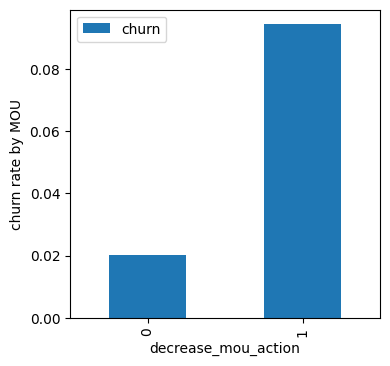

In [60]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar(figsize=(4,4))
plt.ylabel('churn rate by MOU')
plt.show()

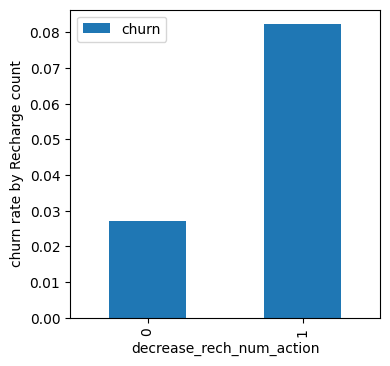

In [61]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar(figsize=(4,4))
plt.ylabel('churn rate by Recharge count')
plt.show()

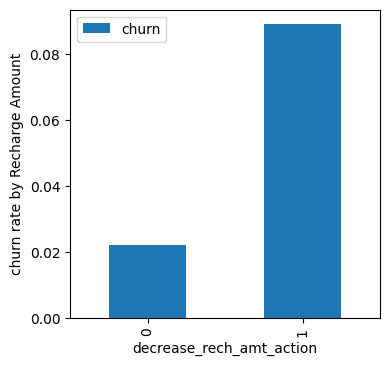

In [62]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar(figsize=(4,4))
plt.ylabel('churn rate by Recharge Amount')
plt.show()

[Text(0.5, 0, 'Action phase ARPU')]

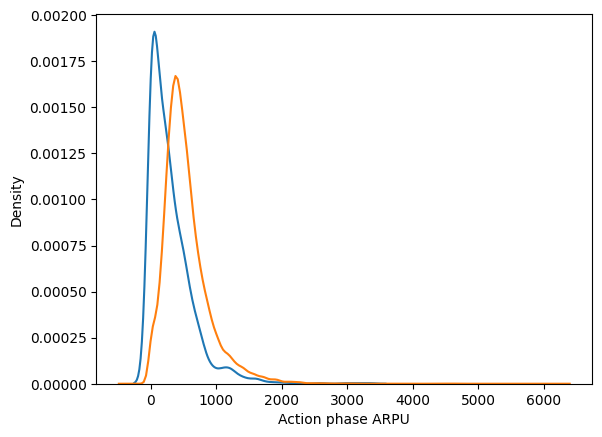

In [63]:
ax = sns.distplot(data[data['churn'] == 1].arpu_8,label='Churn',hist=False)
ax = sns.distplot(data[data['churn'] == 0].arpu_8,label='Not Churn',hist=False)
ax.set(xlabel='Action phase ARPU')

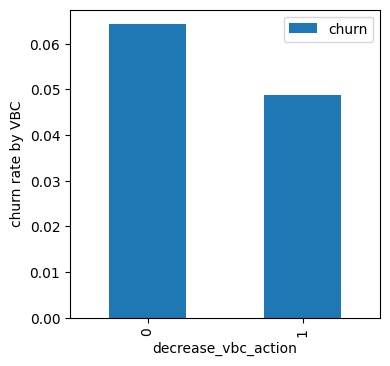

In [64]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar(figsize=(4,4))
plt.ylabel('churn rate by VBC')
plt.show()

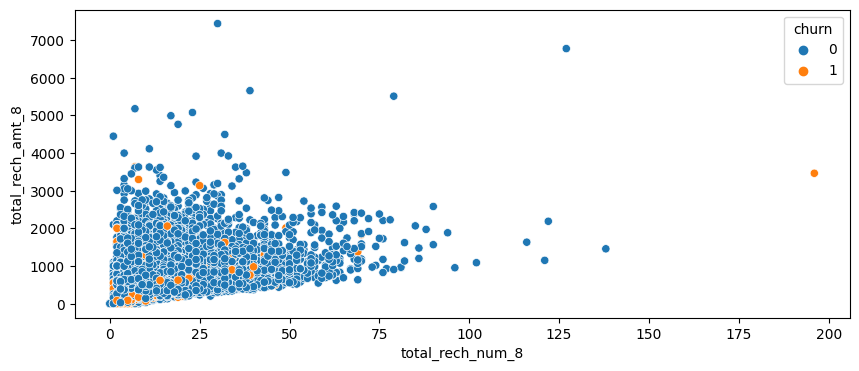

In [65]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(x='total_rech_num_8',y='total_rech_amt_8', hue='churn', data=data)

#### Observations:
    1) Churn rate is high for customers whose MOU has decreased in Action Phase.
    2) Churn rate is high for customers whose number of recharge in the Action Phase is lesser than the number in Good Phase.
    3) Churn rate is high for customers whose Amount of recharge in the Action Phase is lesser than the number in Good Phase.
    4) In Action Phase customer are going with Volumn based recharge then regular monthly recharge
    5) ARPU for Churn customer is more densed then Not churn customer

#### Let's drop these new derived columns as these are not useful for modeling, these are mearly to understand the customer's behaviour

In [66]:
data = data.drop(['avg_mou_good', 'total_mou_action', 'diff_mou', 'avg_rech_num_good', 'diff_rech_num', 
                  'avg_rech_amt_good', 'diff_rech_amt', 'avg_arpu_good', 'avg_vbc_good'], axis=1)

### Checking for Class imbalance

In [67]:
round(100*(df['churn'].mean()),2)

6.26

### Only 6.26% of customer churn, shows class imbalance

#### Train Test split

In [68]:
from sklearn.model_selection import train_test_split
X = data.drop(['churn'], axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
#Dealing with data imbalance We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique)

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
sm = SMOTE(random_state=27)

In [72]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [73]:
## Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()

In [77]:
print(cols_scale)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

In [78]:
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [79]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [80]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,-0.598207,-0.492306,0.200407,-0.470244,-0.377483,0.001639,0.021190,-0.206460,0.090776,-0.251307,-0.248822,-0.268419,-0.266933,-0.308463,-0.301301,0.209478,0.356801,0.853600,1.191532,0.491072,0.866618,3.025580,3.919169,2.964926,-0.262259,-0.208784,-0.217537,1.051405,0.749747,1.236641,-0.562468,-0.549113,-0.412762,-0.556508,-0.517951,-0.420943,0.053877,0.002688,-0.123771,0.0,0.0,0.0,-0.788278,-0.744496,-0.556639,-0.103625,-0.101985,-0.073164,-0.377463,-0.309350,-0.293291,-0.365963,-0.01651,-0.010342,-0.274657,-0.370614,0.121424,-0.053425,0.127148,0.335932,0.018338,0.073367,0.202841,1.002611,0.532763,0.737929,0.131027,0.193144,0.401991,-0.195694,-0.200521,-0.184088,-0.311736,-0.270578,-0.241785,0.195229,0.141642,-0.079271,0.0,0.0,0.0,-0.316905,-0.291551,-0.287117,-0.057732,0.008125,0.208997,-0.377497,-0.107299,-0.179238,-0.179093,-0.169980,-0.141305,-0.080621,-0.092556,-0.077705,-0.618401,-0.803805,-0.436832,-0.064800,-0.585728,0.248426,-0.290704,-0.321628,-0.003478,0.154813,0.176575,0.560315,-0.273009,-0.261981,-0.219629,-0.28695,-0.291611,-0.249728,-0.250729,-0.258421,-0.233954,-0.282374,-0.289333,-0.276730,-0.240673,-0.249915,-0.218078,-0.142464,-0.143724,-0.119362,0.264896,-0.28064,-0.301743,-0.280955,-0.405413,0,1,0,0,0
1,0.0,0.0,0.0,0.190488,0.130698,0.158021,1.484154,2.150254,1.890822,-0.540216,-0.760419,-0.592852,-0.251307,-0.248822,-0.268419,-0.266933,-0.308463,-0.301301,-0.217771,-0.210561,-0.142552,-0.198124,-0.473571,-0.330107,-0.299127,-0.296625,-0.269364,-0.262259,-0.208784,-0.214609,-0.279831,-0.452449,-0.312334,1.710174,2.467376,2.268827,-0.409638,-0.538276,-0.420625,-0.158459,-0.137875,-0.123771,0.0,0.0,0.0,0.899084,1.258711,1.200580,-0.103625,-0.101985,-0.073164,-0.377463,-0.061678,-0.292195,-0.365963,-0.01651,-0.010342,0.730278,0.994702,0.882812,-0.316572,-0.251860,-0.310523,-0.280316,-0.320536,-0.278837,-0.300446,-0.295064,-0.276348,-0.390846,-0.391148,-0.381072,-0.009865,-0.09226

In [81]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
42726,0.0,0.0,0.0,2.000046,1.094345,1.033013,0.022492,-0.201660,0.063620,-0.458867,-0.111602,0.047417,-0.251307,-0.248822,-0.268419,-0.266933,-0.308463,-0.301301,1.383257,0.753645,0.984941,0.314134,1.068726,1.037303,-0.299127,-0.296625,0.023633,1.468973,1.852535,-0.229248,1.059481,1.151890,1.266643,-0.562468,-0.549919,-0.412762,-0.571330,-0.551176,-0.428139,-0.158459,-0.137875,-0.123771,0.0,0.0,0.0,-0.801892,-0.771566,-0.561492,-0.103625,-0.101985,-0.073164,0.240669,0.596090,-0.159068,-0.365963,-0.01651,-0.010342,-0.269602,-0.177556,0.136375,1.590214,1.189186,1.622691,0.080246,-0.037497,0.250397,-0.203933,-0.169723,-0.063213,0.776526,0.527741,0.951516,-0.184141,-0.198099,-0.184088,-0.323700,-0.327864,-0.272102,0.076714,-0.144030,-0.114153,0.0,0.0,0.0,-0.330053,-0.361576,-0.314470,0.490127,0.265857,0.670295,2.965739,4.656651,-0.179238,-0.179093,-0.16998,-0.141305,0.021676,-0.065832,0.011974,0.358148,-0.027945,0.307175,1.633984,1.147200,0.996753,-0.290704,-0.321628,-0.003478,0.154813,0.176575,0.560315,-0.273009,-0.261981,-0.219629,-0.28695,-0.291611,-0.249728,-0.250729,-0.258421,-0.233954,-0.282374,-0.289333,-0.276730,-0.240673,-0.249915,-0.218078,-0.142464,-0.143724,-0.119362,2.203492,-0.28064,-0.301743,-0.280955,1.720128,1,1,1,1,0
13255,0.0,0.0,0.0,-0.201553,-0.137367,-0.086887,0.138038,0.822773,0.526251,0.173224,0.119295,-0.137448,0.137619,-0.248822,-0.192797,0.666513,-0.308463,0.234717,-0.097371,0.193390,0.002323,0.677428,1.095451,0.465838,-0.221545,-0.296625,-0.246729,-0.262259,-0.208784,-0.229248,0.359881,0.803244,0.284746,0.168756,0.832111,0.504029,-0.263930,-0.279643,-0.375567,-0.158459,-0.137875,-0.123771,0.0,0.0,0.0,-0.072598,0.351588,0.074675,-0.103625,-0.101985,-0.073164,-0.377463,-0.371394,-0.297673,-0.365963,-0.01651,-0.010342,0.090494,0.711022,0.196893,0.262492,0.478693,0.552827,1.479267,1.551728,1.288562,-0.300446,-0.213508,-0.276348,1.130432,1.286599,1.126814,1.965184,1.028417,0.286842,-0.096285,

In [82]:
## Logistic regression 
import statsmodels.api as smp

In [83]:
# build the model
# Adding the constant to X_train
log_ch = smp.GLM(y_train,(smp.add_constant(X_train)), family=smp.families.Binomial())

In [84]:
# Fit the model
log_ch = log_ch.fit().summary()

In [85]:
log_ch

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37358
Model:                            GLM   Df Residuals:                    37227
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Jun 2023   Deviance:                   4.2754e+05
Time:                        11:29:55   Pearson chi2:                 2.09e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.157e+15    1.1e+06   1.06e+09      0.000    1.16e+15    1.16e+15
loc_og_t2o_mou            1.942e+07      0.622   3.12e+07      0.000    1.94e+07    1.94e+07
std_og_t2o_mou           -2.554e+06      0.513  -4.98e+06      0.000   -2.55e+06   -2.55e+06
loc_ic_t2o_mou           -1.576e+07      1.051   -1.5e+07      0.000   -1.58e+07   -1.58e+07
arpu_6                   -3.067e+13   1.24e+06  -2.46e+07      0.000   -3.07e+13   -3.07e+13
arpu_7                    9.998e+13   1.37e+06   7.29e+07      0.000       1e+14       1e+14
arpu_8                    1.119e+14   1.65e+06   6.78e+07      0.000    1.12e+14    1.12e+14
onnet_mou_6              -6.063e+14   5.07e+07   -1.2e+07      0.000   -6.06e+14   -6.06e+14
onnet_mou_7               3.644e+14   3.53e+07   1.03e+07      0.000    3.64e+14    3.64e+14
onnet_mou_8                3.23e+13   2.54e+07   1.27e+06      0.000    3.23e+13    3.23e+13
offnet_mou_6             -5.252e+14   5.11e+07  -1.03e+07      0.000   -5.25e+14   -5.25e+14
offnet_mou_7              1.032e+14   3.63e+07   2.84e+06      0.000    1.03e+14    1.03e+14
offnet_mou_8              6.809e+13   2.63e+07   2.59e+06      0.000    6.81e+13    6.81e+13
roam_ic_mou_6              1.92e+13   5.86e+05   3.28e+07      0.000    1.92e+13    1.92e+13
roam_ic_mou_7             1.808e+13   6.13e+05   2.95e+07      0.000    1.81e+13    1.81e+13
roam_ic_mou_8             -1.46e+13   5.12e+05  -2.85e+07      0.000   -1.46e+13   -1.46e+13
roam_og_mou_6             1.709e+14    1.4e+07   1.22e+07      0.000    1.71e+14    1.71e+14
roam_og_mou_7            -7.104e+13    8.1e+06  -8.77e+06      0.000    -7.1e+13    -7.1e+13
roam_og_mou_8             8.855e+12    7.9e+06   1.12e+06      0.000    8.85e+12    8.85e+12
loc_og_t2t_mou_6          6.421e+16    1.4e+10   4.57e+06      0.000    6.42e+16    6.42e+16
loc_og_t2t_mou_7          -3.67e+17   1.42e+10  -2.58e+07      0.000   -3.67e+17   -3.67e+17
loc_og_t2t_mou_8          3.334e+17   1.29e+10   2.59e+07      0.000    3.33e+17    3.33e+17
loc_og_t2m_mou_6          6.485e+16   1.42e+10   4.57e+06      0.000    6.49e+16    6.49e+16
loc_og_t2m_mou_7         -3.556e+17   1.38e+10  -2.58e+07      0.000   -3.56e+17   -3.56e+17
loc_og_t2m_mou_8          3.458e+17   1.33e+10   2.59e+07      0.000    3.46e+17    3.46e+17
loc_og_t2f_mou_6          5.305e+15   1.16e+09   4.59e+06      0.000     5.3e+15     5.3e+15
loc_og_t2f_mou_7         -2.965e+16   1.15e+09  -2.58e+07      0.000   -2.97e+16   -2.97e+16
loc_og_t2f_mou_8          2.941e+16   1.13e+09   2.59e+07      0.000    2.94e+16    2.94e+16
loc_og_t2c_mou_6         -8.429e+12   4.62e+05  -1.83e+07      0.000   -8.43e+12   -8.43e+12
loc_og_t2c_mou_7          8.127e+12   5.84e+05   1.39e+07      0.000    8.13e+12    8.13e+12
loc_og_t2c_mou

In [86]:
## Feature Selection Using RFE

In [87]:
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
log_reg = LogisticRegression()

In [88]:
# RFE with 15 columns
from sklearn.feature_selection import RFE

In [89]:
rfe = RFE(log_reg,n_features_to_select=15)

In [90]:
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [91]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_8', 'std_og_t2m_mou_8', 'og_others_7', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'avg_rech_amt_6_7',
       'decrease_rech_num_action', 'decrease_vbc_action'],
      dtype='object')


In [92]:
## First model with RFE selected columns

In [93]:
# Adding constant to X_train
X_train_sm_one = smp.add_constant(X_train[rfe_cols])

In [94]:
#Instantiate the model
log_ch_one = smp.GLM(y_train, X_train_sm_one, family=smp.families.Binomial())

In [95]:
# Fit the model
log_ch_one = log_ch_one.fit()

log_ch_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37358
Model:                            GLM   Df Residuals:                    37342
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Jun 2023   Deviance:                       32809.
Time:                        11:32:25   Pearson chi2:                 7.90e+04
No. Iterations:                    39   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -38.4680   3391.611     -0.011      0.991   -6685.904    6608.968
offnet_mou_8                -0.6660      0.045    -14.821      0.000      -0.754      -0.578
std_og_t2m_mou_8             0.7584      0.041     18.355      0.000       0.677       0.839
og_others_7                 -2.3849      0.803     -2.970      0.003      -3.958      -0.811
og_others_8              -3760.3803   3.28e+05     -0.011      0.991   -6.47e+05    6.39e+05
total_og_mou_8              -0.7311      0.026    -27.627      0.000      -0.783      -0.679
loc_ic_t2m_mou_7             0.8322      0.036     23.036      0.000       0.761       0.903
loc_ic_t2m_mou_8            -1.1977      0.064    -18.818      0.000      -1.322      -1.073
total_ic_mou_8              -0.8542      0.044    -19.344      0.000      -0.941      -0.768
total_rech_num_7             0.6965      0.027     25.516      0.000       0.643       0.750
total_rech_num_8            -1.1300      0.032    -34.911      0.000      -1.193      -1.067
monthly_2g_8                -0.8670      0.036    -23.967      0.000      -0.938      -0.796
monthly_3g_8                -0.8513      0.032    -26.755      0.000      -0.914      -0.789
avg_rech_amt_6_7             0.5719      0.020     29.243      0.000       0.534       0.610
decrease_rech_num_action    -1.0319      0.038    -27.153      0.000      -1.106      -0.957
decrease_vbc_action         -0.8747      0.054    -16.229      0.000      -0.980      -0.769
============================================================================================
"""

In [96]:
## Checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,6.53
1,std_og_t2m_mou_8,5.32
6,loc_ic_t2m_mou_8,4.50
7,total_ic_mou_8,2.90
4,total_og_mou_8,2.71
5,loc_ic_t2m_mou_7,2.61
9,total_rech_num_8,2.58
8,total_rech_num_7,2.22
12,avg_rech_amt_6_7,1.42
13,decrease_rech_num_action,1.22


In [98]:
## Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [99]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_8', 'std_og_t2m_mou_8', 'og_others_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'avg_rech_amt_6_7', 'decrease_rech_num_action', 'decrease_vbc_action']


In [ ]:
## Model second : Building the model after removing og_others_8 variable.

In [100]:
# Adding constant to X_train
X_train_sm_second = smp.add_constant(X_train[log_cols])

#Instantiate the model
log_ch_second = smp.GLM(y_train, X_train_sm_second, family=smp.families.Binomial())

# Fit the model
log_ch_second = log_ch_second.fit()

log_ch_second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37358
Model:                            GLM   Df Residuals:                    37343
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16435.
Date:                Tue, 06 Jun 2023   Deviance:                       32871.
Time:                        11:34:40   Pearson chi2:                 7.94e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4147      0.034     12.304      0.000       0.349       0.481
offnet_mou_8                -0.6672      0.045    -14.862      0.000      -0.755      -0.579
std_og_t2m_mou_8             0.7583      0.041     18.379      0.000       0.677       0.839
og_others_7                 -2.5906      0.743     -3.487      0.000      -4.047      -1.135
total_og_mou_8              -0.7311      0.026    -27.632      0.000      -0.783      -0.679
loc_ic_t2m_mou_7             0.8340      0.036     23.103      0.000       0.763       0.905
loc_ic_t2m_mou_8            -1.1993      0.064    -18.860      0.000      -1.324      -1.075
total_ic_mou_8              -0.8545      0.044    -19.358      0.000      -0.941      -0.768
total_rech_num_7             0.6972      0.027     25.561      0.000       0.644       0.751
total_rech_num_8            -1.1320      0.032    -35.000      0.000      -1.195      -1.069
monthly_2g_8                -0.8666      0.036    -23.957      0.000      -0.937      -0.796
monthly_3g_8                -0.8504      0.032    -26.736      0.000      -0.913      -0.788
avg_rech_amt_6_7             0.5720      0.020     29.277      0.000       0.534       0.610
decrease_rech_num_action    -1.0334      0.038    -27.219      0.000      -1.108      -0.959
decrease_vbc_action         -0.8738      0.054    -16.225      0.000      -0.979      -0.768
============================================================================================
"""

In [101]:
## checking VIF model 2
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_8,6.53
1,std_og_t2m_mou_8,5.32
5,loc_ic_t2m_mou_8,4.50
6,total_ic_mou_8,2.90
3,total_og_mou_8,2.71
4,loc_ic_t2m_mou_7,2.61
8,total_rech_num_8,2.58
7,total_rech_num_7,2.22
11,avg_rech_amt_6_7,1.42
12,decrease_rech_num_action,1.22


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 6.53. Hence, deleting offnet_mou_8 column.

In [102]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

In [103]:
## Model- third
# Model after removing total_og_mou_8 column.

In [104]:
# Adding constant to X_train
X_train_sm_third = smp.add_constant(X_train[log_cols])

#Instantiate the model
log_ch_third = smp.GLM(y_train, X_train_sm_third, family=smp.families.Binomial())

# Fit the model
log_ch_third = log_ch_third.fit()

log_ch_third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37358
Model:                            GLM   Df Residuals:                    37344
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16550.
Date:                Tue, 06 Jun 2023   Deviance:                       33101.
Time:                        11:37:22   Pearson chi2:                 8.27e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3936
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3743      0.034     11.170      0.000       0.309       0.440
std_og_t2m_mou_8             0.2409      0.021     11.495      0.000       0.200       0.282
og_others_7                 -2.6139      0.726     -3.598      0.000      -4.038      -1.190
total_og_mou_8              -0.7729      0.027    -28.852      0.000      -0.825      -0.720
loc_ic_t2m_mou_7             0.8370      0.036     23.442      0.000       0.767       0.907
loc_ic_t2m_mou_8            -1.4102      0.062    -22.645      0.000      -1.532      -1.288
total_ic_mou_8              -0.8406      0.044    -19.063      0.000      -0.927      -0.754
total_rech_num_7             0.7526      0.027     27.707      0.000       0.699       0.806
total_rech_num_8            -1.1697      0.032    -36.029      0.000      -1.233      -1.106
monthly_2g_8                -0.8697      0.036    -24.034      0.000      -0.941      -0.799
monthly_3g_8                -0.8296      0.032    -26.291      0.000      -0.891      -0.768
avg_rech_amt_6_7             0.4797      0.018     26.203      0.000       0.444       0.516
decrease_rech_num_action    -0.9829      0.038    -26.064      0.000      -1.057      -0.909
decrease_vbc_action         -0.8524      0.054    -15.922      0.000      -0.957      -0.747
============================================================================================
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2m_mou_8,4.29
5,total_ic_mou_8,2.90
3,loc_ic_t2m_mou_7,2.60
7,total_rech_num_8,2.54
2,total_og_mou_8,2.53
6,total_rech_num_7,2.15
0,std_og_t2m_mou_8,1.90
10,avg_rech_amt_6_7,1.32
11,decrease_rech_num_action,1.22
12,decrease_vbc_action,1.16


We can see that all of the variables are significant at this point and that there is no multicollinearity among the variables from the model summary and the VIF list.

Hence model thrid is the final one.

In [ ]:
## Model performance on the train set

In [106]:
# Getting the predicted value on the train set
y_train_pred = log_ch_third.predict(X_train_sm_third)
y_train_pred.head()

0    0.256330
1    0.239455
2    0.431197
3    0.524822
4    0.797195
dtype: float64

In [107]:
#Creating a dataframe with the actual churn and the predicted probabilities
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.256330,0
1,0,0.239455,1
2,0,0.431197,2
3,0,0.524822,3
4,0,0.797195,4


In [108]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.256330,0,1,1,1,0,0,0,0,0,0,0
1,0,0.239455,1,1,1,1,0,0,0,0,0,0,0
2,0,0.431197,2,1,1,1,1,1,0,0,0,0,0
3,0,0.524822,3,1,1,1,1,1,1,0,0,0,0
4,0,0.797195,4,1,1,1,1,1,1,1,1,0,0


In [109]:
#Finding Optimal Probablity Cutoff Point
from sklearn.metrics import confusion_matrix
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm_one = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm_one))
    accuracy = (cm_one[0,0]+cm_one[1,1])/total1
    
    speci = cm_one[0,0]/(cm_one[0,0]+cm_one[0,1])
    sensi = cm_one[1,1]/(cm_one[1,0]+cm_one[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.664409     0.978371     0.350447
0.2          0.2  0.715964     0.955619     0.476310
0.3          0.3  0.753386     0.927137     0.579635
0.4          0.4  0.784169     0.888699     0.679640
0.5          0.5  0.805664     0.838535     0.772793
0.6          0.6  0.810215     0.767654     0.852776
0.7          0.7  0.781519     0.647733     0.915306
0.8          0.8  0.700493     0.445259     0.955726
0.9          0.9  0.588361     0.192783     0.983939


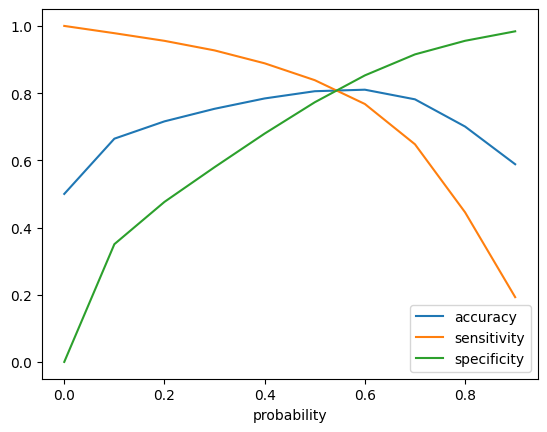

In [110]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Accuracy: Around 0.6, it stabilises.
Sensitivity - Declines as probability rises.
As probability rises, specificity rises as well.
We can observe that there is an accurate balance between sensitivity and specificity at point 0.6 where the three parameters cross each other.
Here, sensitivity is more important than accuracy and specificity to us. Although the ideal probability cutoff should be 0.6 according to the preceding curve, we are using 0.5 in order to get increased sensitivity, which is our primary objective.

In [111]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.256330,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.239455,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.431197,2,1,1,1,1,1,0,0,0,0,0,0
3,0,0.524822,3,1,1,1,1,1,1,0,0,0,0,1
4,0,0.797195,4,1,1,1,1,1,1,1,1,0,0,1


In [112]:
# Confusion metrics
confusion = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[14435  4244]
 [ 3016 15663]]


In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
from sklearn.metrics import accuracy_score
# Accuracy
print("Accuracy:-",accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8056641147813052
Sensitivity:- 0.8385352534932277
Specificity:- 0.7727929760693827


On the train set prediction, we have good accuracy, sensitivity, and specificity.

In [115]:
## Plotting the ROC Curve (Trade off between sensitivity & specificity)
# ROC Curve function
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

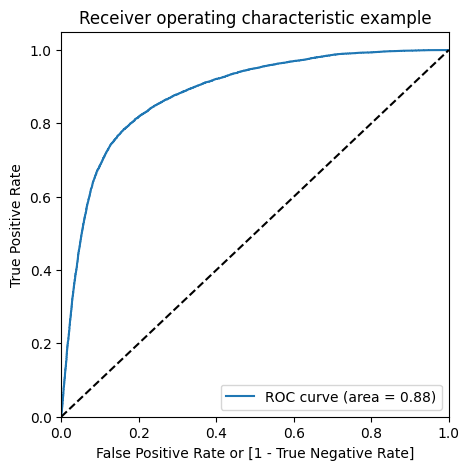

In [116]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

# We can observe that the ROC curve's area is closer to 1 than it is to the model's Gini coefficient.


In [117]:
# Testing the model on the test set
X_test_log = X_test.copy()

In [118]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [119]:
# Adding constant on the test set
X_test_sm = smp.add_constant(X_test_log)

In [122]:
# Predict on the test set
y_test_pred = log_ch_third.predict(X_test_sm)

In [123]:
y_test_pred.head()

42726    0.290549
13255    0.006536
20798    0.126918
86898    0.635941
93459    0.172608
dtype: float64

In [124]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
42726,0.290549
13255,0.006536
20798,0.126918
86898,0.635941
93459,0.172608


In [125]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
42726,0
13255,0
20798,0
86898,0
93459,0


In [126]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [127]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [129]:
y_test_pred_final.head()

,churn,CustID,0
0,0,42726,0.290549
1,0,13255,0.006536
2,0,20798,0.126918
3,0,86898,0.635941
4,0,93459,0.172608


In [130]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [131]:

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [132]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,42726,0,0.290549
1,13255,0,0.006536
2,20798,0,0.126918
3,86898,0,0.635941
4,93459,0,0.172608


In [133]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [134]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,42726,0,0.290549,0
1,13255,0,0.006536,0
2,20798,0,0.126918,0
3,86898,0,0.635941,1
4,93459,0,0.172608,0


In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[6192 1818]
 [ 112  416]]


In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7739517451393769
Sensitivity:- 0.7878787878787878
Specificity:- 0.7730337078651686


Model Summary:

Train set:

Accuracy:- 0.8056641147813052
Sensitivity:- 0.8385352534932277
Specificity:- 0.7727929760693827

Test Set:
Accuracy:- 0.7739517451393769
Sensitivity:- 0.7878787878787878
Specificity:- 0.7730337078651686

